# Data Management with R - a glimpse

This notebook demonstrates how to use R to perform the same data management operations as the one performed with OpenRefine in the following Data Carpentry workshop: https://datacarpentry.org/openrefine-socialsci/

In [1]:
library(readr)

# Loading data
df <- read_csv('https://ndownloader.figshare.com/files/11502815')

Warning message:
"package 'readr' was built under R version 3.6.3"Parsed with column specification:
cols(
  .default = col_character(),
  quest_no = col_double(),
  start = col_datetime(format = ""),
  end = col_datetime(format = ""),
  years_farm = col_double(),
  no_membrs = col_double(),
  `_members_count` = col_double(),
  years_liv = col_double(),
  buildings_in_compound = col_double(),
  rooms = col_double(),
  no_plots = col_double(),
  plots_count = col_double(),
  liv_count = col_double(),
  no_meals = col_double(),
  gps_Latitude = col_double(),
  gps_Longitude = col_double(),
  gps_Altitude = col_double(),
  gps_Accuracy = col_double()
)
See spec(...) for full column specifications.


In [2]:
# Preview of data (by default the first 6 rows)

head(df)

interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
17-Nov-16,1,2017-03-23 09:49:57,2017-04-02 17:29:08,Manica,Manica,Bandula,God,11,no,...,['bicycle' ; 'television' ; 'solar_panel' ; 'table'],NULL,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; 'day_night_hungry'],-19.11226,33.48346,698,14,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
17-Nov-16,1,2017-04-02 09:48:16,2017-04-02 17:26:19,Manica,Manica,Bandula,God,2,yes,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_plough' ; 'solar_panel' ; 'solar_torch' ; 'table' ; 'mobile_phone'],NULL,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ; 'borrow_food' ; 'seek_government'],-19.11248,33.48342,690,19,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
17-Nov-16,3,2017-04-02 14:35:26,2017-04-02 17:26:53,Manica,Manica,Bandula,God,40,no,...,['solar_torch'],NULL,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.11211,33.48345,674,13,uuid:193d7daf-9582-409b-bf09-027dd36f9007
17-Nov-16,4,2017-04-02 14:55:18,2017-04-02 17:27:16,Manica,Manica,Bandula,God,6,no,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'solar_panel' ; 'mobile_phone'],NULL,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ; 'lab_ex_food'],-19.11223,33.48342,679,5,uuid:148d1105-778a-4755-aa71-281eadd4a973
17-Nov-16,5,2017-04-02 15:10:35,2017-04-02 17:27:35,Manica,Manica,Bandula,God,18,no,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mobile_phone'],NULL,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.11222,33.48343,689,10,uuid:2c867811-9696-4966-9866-f35c3e97d02d
17-Nov-16,6,2017-04-02 15:27:25,2017-04-02 17:28:02,Manica,Manica,Bandula,God,3,no,...,NULL,NULL,2,['Aug' ; 'Sept' ; 'Oct'],['borrow_food' ; 'lab_ex_food' ; 'seek_government'],-19.11220,33.48339,692,12,uuid:daa56c91-c8e3-44c3-a663-af6a49a2ca70


In [3]:
# Counts of unique values ("faceting" in Open Refine)

table(df$village)


               49          Chirdozo          Chirodzo               God 
                1                 1                37                43 
            Ruaca   Ruaca-Nhamuenda Ruaca - Nhamuenda              Ruca 
               43                 3                 1                 2 

In [4]:
# Correcting errors manually - using base R
ruaca_alias <- c('Ruaca-Nhamuenda', 'Ruca', 'Ruaca - Nhamuenda', 'Ruaca')
chirodzo_alias <- c('Chirodzo', 'Chirdozo')

df$village <- ifelse(df$village %in% ruaca_alias, "Ruaca", df$village) # See markdown comment below
df$village <- ifelse(df$village %in% chirodzo_alias, "Chirodzo", df$village)

The code above roughly translates to: "If the village value is one of the values listen in ruaca_alias, change the value to "Ruaca". Otherwise keep the existing village value". 

In [5]:
# Checking the change

table(df$village)


      49 Chirodzo      God    Ruaca 
       1       38       43       49 

In [6]:
# Correcting errors manually - using tidyverse/dplyr
library(dplyr)

df <- read_csv('https://ndownloader.figshare.com/files/11502815')

ruaca_alias <- c('Ruaca-Nhamuenda', 'Ruca', 'Ruaca - Nhamuenda', 'Ruaca')
chirodzo_alias <- c('Chirodzo', 'Chirdozo')

df <- mutate(df, village = case_when(
    village %in% ruaca_alias ~ "Ruaca",
    village %in% chirodzo_alias ~ "Chirodzo",
    TRUE ~ village)) # This line makes sure remaining values keep their original value

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Parsed with column specification:
cols(
  .default = col_character(),
  quest_no = col_double(),
  start = col_datetime(format = ""),
  end = col_datetime(format = ""),
  years_farm = col_double(),
  no_membrs = col_double(),
  `_members_count` = col_double(),
  years_liv = col_double(),
  buildings_in_compound = col_double(),
  rooms = col_double(),
  no_plots = col_double(),
  plots_count = col_double(),
  liv_count = col_double(),
  no_meals = col_double(),
  gps_Latitude = col_double(),
  gps_Longitude = col_double(),
  gps_Altitude = col_double(),
  gps_Accuracy = col_double()
)
See spec(...) for full column specifications.


In [7]:
# Checking the change

table(df$village)


      49 Chirodzo      God    Ruaca 
       1       38       43       49 

In [8]:
df$interview_date

[1] "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16"
  [7] "17-Nov-16" "16-Nov-16" "16-Nov-16" "16-Dec-16" "21-Nov-16" "21-Nov-16"
 [13] "21-Nov-16" "21-Nov-16" "21-Nov-16" "24-Nov-16" "21-Nov-16" "21-Nov-16"
 [19] "21-Nov-16" "21-Nov-16" "21-Nov-16" "21-Nov-16" "21-Nov-16" "21-Nov-16"
 [25] "21-Nov-16" "21-Nov-16" "21-Nov-16" "21-Nov-16" "21-Nov-16" "21-Nov-16"
 [31] "21-Nov-16" "21-Nov-16" "21-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16"
 [37] "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16"
 [43] "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16" "17-Nov-16" "16-Nov-16"
 [49] "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16"
 [55] "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16"
 [61] "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16"
 [67] "16-Nov-16" "16-Nov-16" "16-Nov-16" "16-Nov-16" "18-Nov-16" "16-Nov-16"
 [73] "23-Nov-16" "24-Nov-16" "24-Nov-16" "24-Nov-16" "25-Nov-16" "25-Nov-16"
 [79] "25-Nov-16" "25-Nov-16" "25-Nov-16" "28-Nov-16" "28-Nov-16" "28-Nov-16"
 [85] "28-Nov-16" "28-Nov-16" "28-Nov-16" "21-Nov-16" "17-Nov-16" "26-Apr-17"
 [91] "26-Apr-17" "26-Apr-17" "27-Apr-17" "27-Apr-17" "27-Apr-17" "27-Apr-17"
 [97] "27-Apr-17" "28-Apr-17" "28-Apr-17" "28-Apr-17" "28-Apr-17" "28-Apr-17"
[103] "30-Apr-17" "3-May-17"  "3-May-17"  "3-May-17"  "4-May-17"  "4-May-17" 
[109] "4-May-17"  "11-May-17" "11-May-17" "11-May-17" "11-May-17" "18-May-17"
[115] "18-May-17" "18-May-17" "18-May-17" "3-Jun-17"  "3-Jun-17"  "3-Jun-17" 
[121] "3-Jun-17"  "3-Jun-17"  "3-Jun-17"  "3-Jun-17"  "3-Jun-17"  "3-Jun-17" 
[127] "18-May-17" "4-Jun-17"  "4-Jun-17"  "4-Jun-17"  "4-Jun-17"

In [9]:
# Convert to datetime with lubridate
library(lubridate)

df$interview_date <- dmy(df$interview_date) # dmy for "date-month-year"

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



In [10]:
# Extracting date information

df$interview_month = month(df$interview_date)
head(df[, c('interview_date', 'interview_month')], 10)

interview_date,interview_month
2016-11-17,11
2016-11-17,11
2016-11-17,11
2016-11-17,11
2016-11-17,11
2016-11-17,11
2016-11-17,11
2016-11-16,11
2016-11-16,11
2016-12-16,12


In [11]:
# Cleaning up character values
punct_remove = c("\\[", "\\]", "'", " ")

for (punct in punct_remove){
    df$items_owned = gsub(punct, "", df$items_owned)
   }

head(df$items_owned)

[1] "bicycle;television;solar_panel;table"                                        
[2] "cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone"
[3] "solar_torch"                                                                 
[4] "bicycle;radio;cow_plough;solar_panel;mobile_phone"                           
[5] "motorcyle;radio;cow_plough;mobile_phone"                                     
[6] "NULL"

In [12]:
# Counting values (using tidyr)
library(tidyr)

df_long <- separate_rows(df, items_owned, sep = ";")

df_long %>%
    group_by(items_owned)%>%
    summarize(count = n()) %>%
    arrange(desc(count))

Warning message:
"package 'tidyr' was built under R version 3.6.2"`summarise()` ungrouping output (override with `.groups` argument)


items_owned,count
mobile_phone,86
radio,86
cow_plough,85
solar_panel,65
bicycle,60
solar_torch,52
table,45
motorcyle,39
television,31
cow_cart,30


The code above works in the following way:
- The individual items in "items_owned" are split into individual rows with the separate_rows arguement. Each observation is thus duplicated for every item the observation owns (a tidy data format)
- Using group by and summarize, the data is grouped by the items owned and afterwards each item is counted.

In [13]:
# Filtering values - text match
df_mabat <- df[grepl('mabat', df$respondent_roof_type), ]
                      
table(df_mabat$respondent_roof_type)


mabatipitched mabatisloping 
           10            48 

In [14]:
# Filtering values - specific values
keep_rooftypes <- c('mabatipitched', 'mabatisloping') 

df_mabat2 <- df[df$respondent_roof_type %in% keep_rooftypes, ]
table(df_mabat2$respondent_roof_type)


mabatipitched mabatisloping 
           10            48 

In [15]:
# Filtering values - specific values, inverted
df_mabat3 <- df[!(df$respondent_roof_type %in% keep_rooftypes), ]
table(df_mabat3$respondent_roof_type)


grass 
   73 

In [16]:
# Sorting values - using dplyr

head(arrange(df, gps_Altitude))

interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID,interview_month
2016-11-17,39,2017-04-06 08:31:17,2017-04-06 08:44:47,Manica,Manica,Bandula,God,22,yes,...,NULL,3,['Nov'],['lab_ex_food'],-19.04336,33.40467,0,20.000,uuid:c0fb6310-55af-4831-ae3d-2729556c3285,11
2016-11-17,40,2017-04-06 08:44:51,2017-04-06 09:03:47,Manica,Manica,Bandula,God,23,yes,...,NULL,3,['Sept' ; 'Oct' ; 'Nov'],['lab_ex_food'],-19.04336,33.40467,0,22.112,uuid:c0b34854-eede-4e81-b183-ef58a45bfc34,11
2016-11-23,133,2017-04-09 05:27:46,2017-04-09 05:43:51,Manica,Manica,Bandula,Ruaca,2,no,...,NULL,3,['Jan' ; 'Oct' ; 'Nov'],['na'],-19.10413,33.47776,0,2099.999,uuid:429d279a-a519-4dcc-9f64-4673b0fd5d53,11
2017-05-11,115,2017-05-11 05:24:25,2017-05-11 05:41:56,Manica,Manica,Bandula,Ruaca,16,no,...,NULL,3,['none'],['na'],-19.11147,33.47610,0,20.000,uuid:628fe23d-188f-43e4-a203-a4bf3257d461,5
2017-05-11,108,2017-05-11 05:42:08,2017-05-11 06:08:58,Manica,Manica,Bandula,God,22,no,...,NULL,3,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['rely_less_food' ; 'limit_portion' ; 'reduce_meals'],-19.11147,33.47610,0,20.000,uuid:e4f4d6ba-e698-45a5-947f-ba6da88cc22b,5
2017-05-11,116,2017-05-11 06:09:56,2017-05-11 06:22:19,Manica,Manica,Bandula,Ruaca,21,yes,...,NULL,3,['Jan' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'reduce_meals' ; 'lab_ex_food'],-19.11147,33.47610,0,20.000,uuid:cfee6297-2c0e-4f8a-94cc-9aaee0bd64cb,5


In [17]:
# Sorting values - multiple

head(arrange(df, gps_Altitude, gps_Longitude))

interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID,interview_month
2016-11-17,39,2017-04-06 08:31:17,2017-04-06 08:44:47,Manica,Manica,Bandula,God,22,yes,...,NULL,3,['Nov'],['lab_ex_food'],-19.04336,33.40467,0,20.000,uuid:c0fb6310-55af-4831-ae3d-2729556c3285,11
2016-11-17,40,2017-04-06 08:44:51,2017-04-06 09:03:47,Manica,Manica,Bandula,God,23,yes,...,NULL,3,['Sept' ; 'Oct' ; 'Nov'],['lab_ex_food'],-19.04336,33.40467,0,22.112,uuid:c0b34854-eede-4e81-b183-ef58a45bfc34,11
2017-05-11,115,2017-05-11 05:24:25,2017-05-11 05:41:56,Manica,Manica,Bandula,Ruaca,16,no,...,NULL,3,['none'],['na'],-19.11147,33.47610,0,20.000,uuid:628fe23d-188f-43e4-a203-a4bf3257d461,5
2017-05-11,108,2017-05-11 05:42:08,2017-05-11 06:08:58,Manica,Manica,Bandula,God,22,no,...,NULL,3,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['rely_less_food' ; 'limit_portion' ; 'reduce_meals'],-19.11147,33.47610,0,20.000,uuid:e4f4d6ba-e698-45a5-947f-ba6da88cc22b,5
2017-05-11,116,2017-05-11 06:09:56,2017-05-11 06:22:19,Manica,Manica,Bandula,Ruaca,21,yes,...,NULL,3,['Jan' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'reduce_meals' ; 'lab_ex_food'],-19.11147,33.47610,0,20.000,uuid:cfee6297-2c0e-4f8a-94cc-9aaee0bd64cb,5
2017-05-11,117,2017-05-11 06:28:02,2017-05-11 06:55:35,Manica,Manica,Bandula,Ruaca,1,no,...,NULL,3,['Jan' ; 'Feb' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'reduce_meals' ; 'restrict_adults' ; 'borrow_food' ; 'lab_ex_food'],-19.11147,33.47610,0,20.000,uuid:3fe626b3-c794-48e1-a80f-5bfe440c507b,5


In [18]:
# Convert numerical to string (text)

df$years_farm = as.character(df$years_farm)

head(df$years_farm)

[1] "11" "2"  "40" "6"  "18" "3"

In [19]:
# Convert string to numerical

df$years_farm = as.numeric(df$years_farm)

head(df$years_farm)

[1] 11  2 40  6 18  3

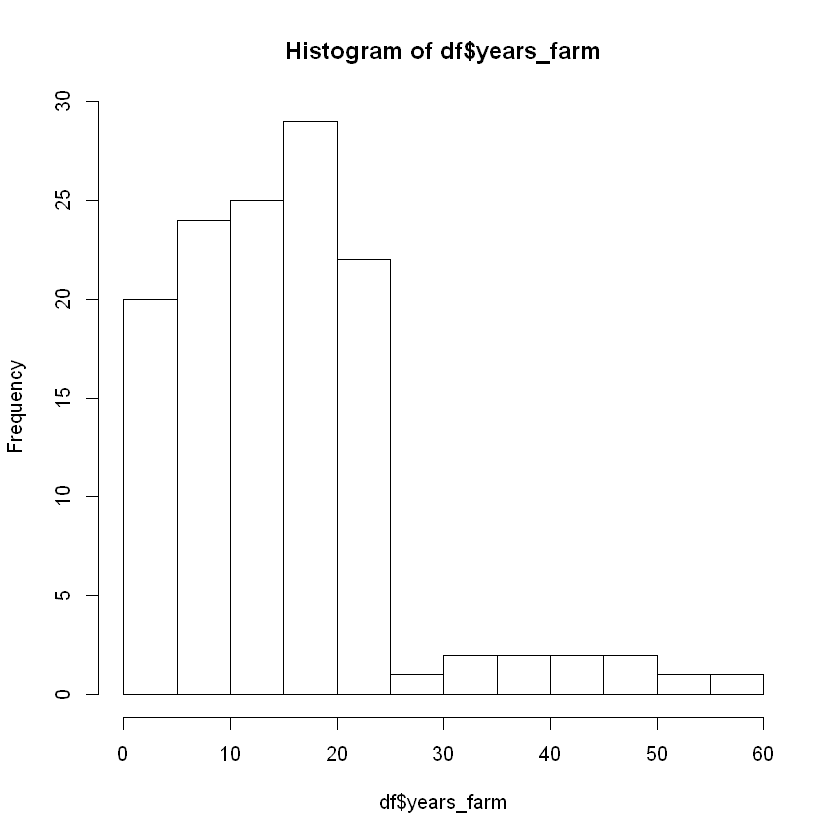

In [20]:
# Exploring numberical data (with a histogram)
hist(df$years_farm)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


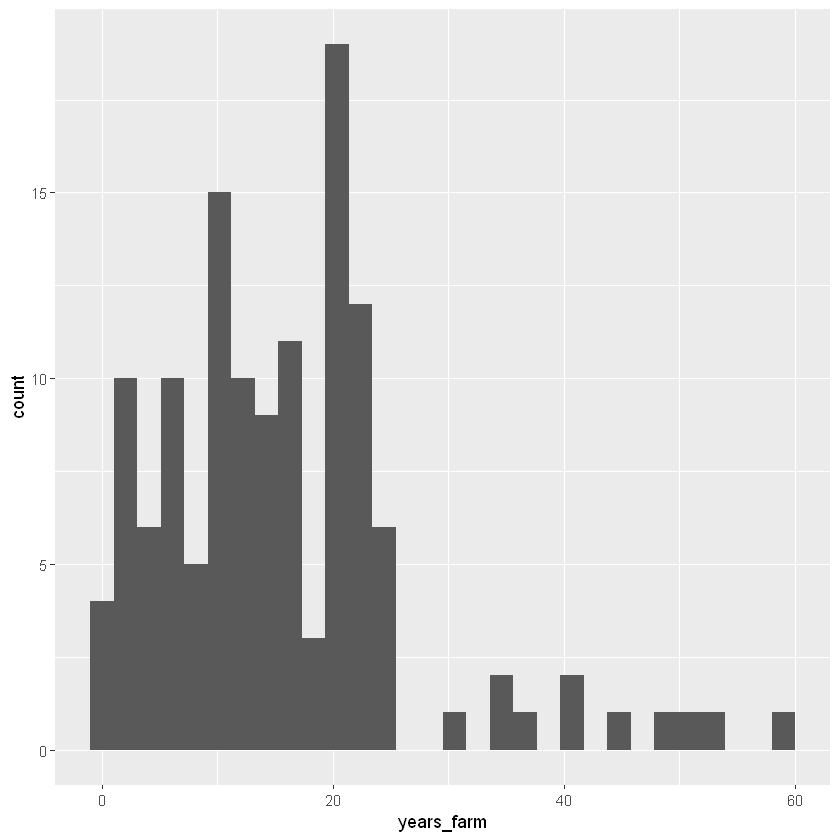

In [21]:
# Exploring numberical data (with a histogram using ggplot)
library(ggplot2)

ggplot(data = df, aes(x = years_farm)) +
    geom_histogram()

In [22]:
# Save data

write.csv(df, '../data/SAFI_edit.csv', row.names = FALSE)